In [58]:
import pickle
import json
import numpy as np
import skimage.io as io
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tools.utils import draw_bbboxes, xyxy_to_xywh, xywh_to_xyxy



In [ ]:

coco_val = COCO("/home.nfs/babayeln/thesis/mask-rcnn.pytorch/data/coco/annotations/instances_train2017.json")

def visualize(url,  bboxes, classes, coco_style=False):
    I = io.imread(url)
    # Create a Rectangle patch
    fig,ax = plt.subplots(1, figsize=(15,15))
    plt.imshow(I); plt.axis('off')
    
    for idx, bbox in enumerate(bboxes):
        if coco_style:
            x, y, w, h = xyxy_to_xywh(bbox)
        else:
            x, y, w, h = bbox
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none' )
        ax.add_patch(rect)
        ax.annotate(coco_val.cats[classes[idx]]["name"], (x+w/2,y))

[3, 3, 10, 10, 10, 10, 1, 3, 3, 10, 10, 3, 3, 3, 3, 3, 3, 3, 3, 3]


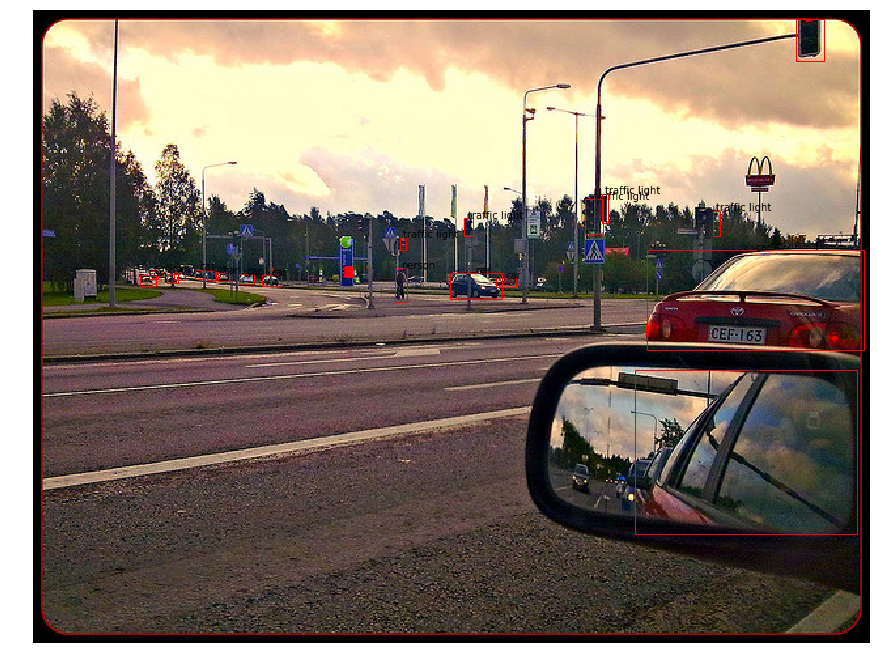

In [94]:

anns = coco_val.getAnnIds(imgIds=16039)
boxes = [coco_val.anns[ann]['bbox'] for ann in anns]
categoris = [coco_val.anns[ann]['category_id'] for ann in anns]
print(categoris)

visualize(coco_val.imgs[16039]['coco_url'],  boxes, categoris, False)

In [91]:
N = 1

[10] [0]


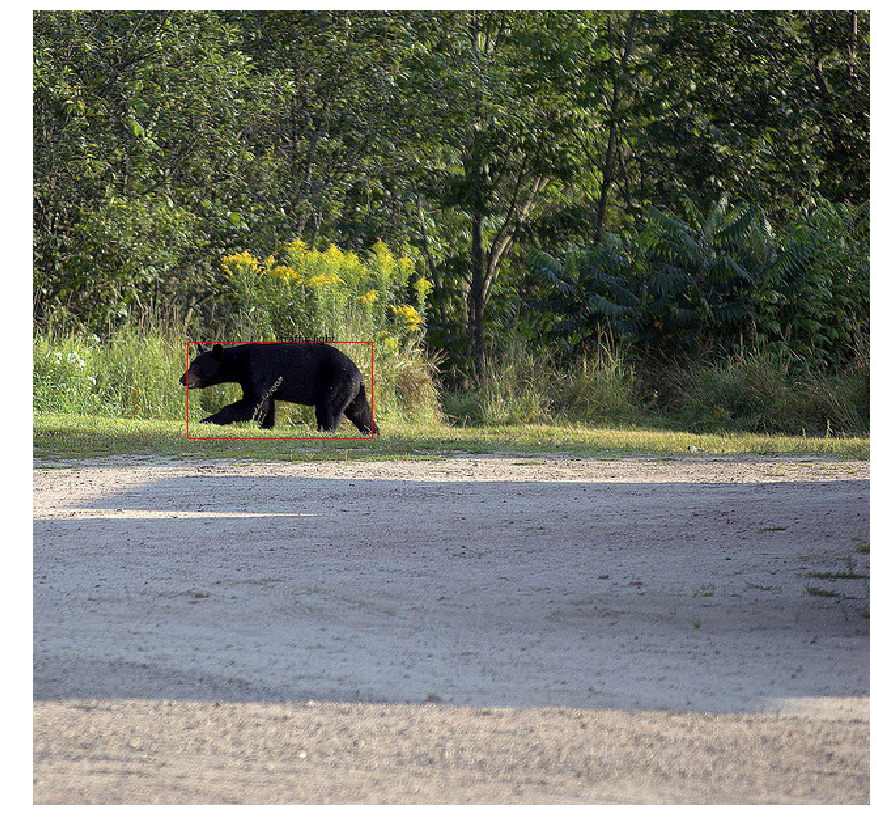

In [92]:
PATH = "data/outputs/coco_parts/123_debug/faster-rcnn/r-50-fpn-2x/roidb_initial.pkl.npy"
roidb =np.load(PATH, allow_pickle=True)
roi = roidb[N]
print(roi['gt_classes'], roi["dataset_idx"])
visualize(roi['coco_url'],  roi['boxes'], roi['gt_classes'], True)

In [93]:
roi

{'coco_url': 'http://images.cocodataset.org/train2017/000000011364.jpg',
 'height': 608,
 'width': 640,
 'flickr_url': 'http://farm4.staticflickr.com/3532/3822795223_2706d1121b_z.jpg',
 'id': 11364,
 'dataset': -1,
 'image': '/home.nfs/babayeln/doc/data/coco/train2017/000000011364.jpg',
 'flipped': False,
 'has_visible_keypoints': False,
 'boxes': array([[117.36, 253.76, 257.95, 326.22]], dtype=float32),
 'segms': [[[184.43,
    253.76,
    227.02,
    259.08,
    250.44,
    270.79,
    258.95,
    301.67,
    257.89,
    325.09,
    242.98,
    313.38,
    238.73,
    306.99,
    234.47,
    321.89,
    222.76,
    321.89,
    217.43,
    305.92,
    195.08,
    300.6,
    188.69,
    311.25,
    184.43,
    327.22,
    167.4,
    318.7,
    148.24,
    318.7,
    137.59,
    312.31,
    161.01,
    298.47,
    161.01,
    286.76,
    148.24,
    285.7,
    128.01,
    291.02,
    117.36,
    291.02,
    121.62,
    281.44,
    126.95,
    272.92,
    125.88,
    259.08,
    133.33,


[10 10 10] [1] 286770


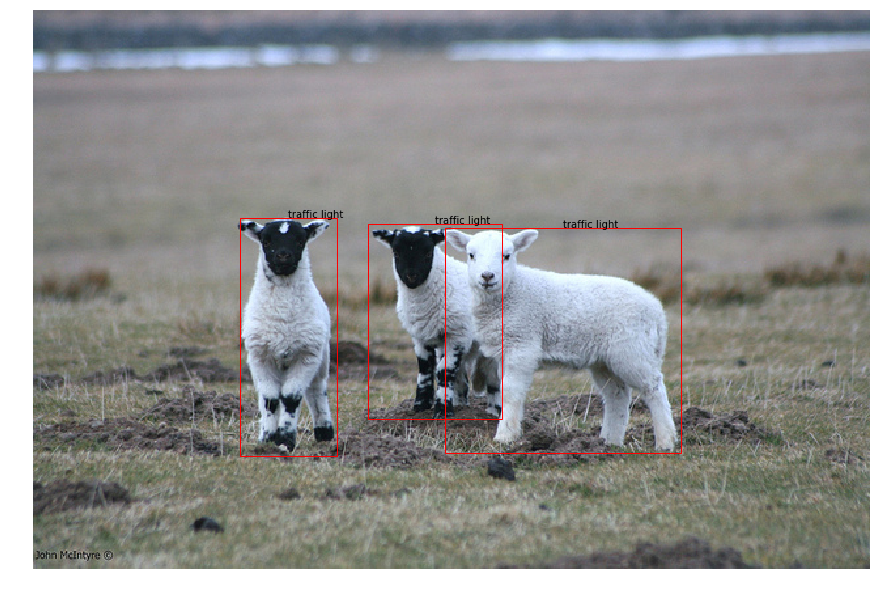

In [57]:
PATH = "data/outputs/coco_parts/123_debug/faster-rcnn/r-50-fpn-2x/roidb_initial_81.pkl.npy"
roidb =np.load(PATH, allow_pickle=True)
roi = roidb[N]
print(roi['gt_classes'], roi["dataset_idx"], roi["id"])
visualize(roi['coco_url'],  roi['boxes'], roi['gt_classes'], True)

In [86]:

PATH = "data/outputs/coco_parts/123_debug/faster-rcnn/r-50-fpn-2x/test/bbox_coco2017_part0_debug_results.json"
with open(PATH, "rb") as f:
    tmp = json.load(f)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]


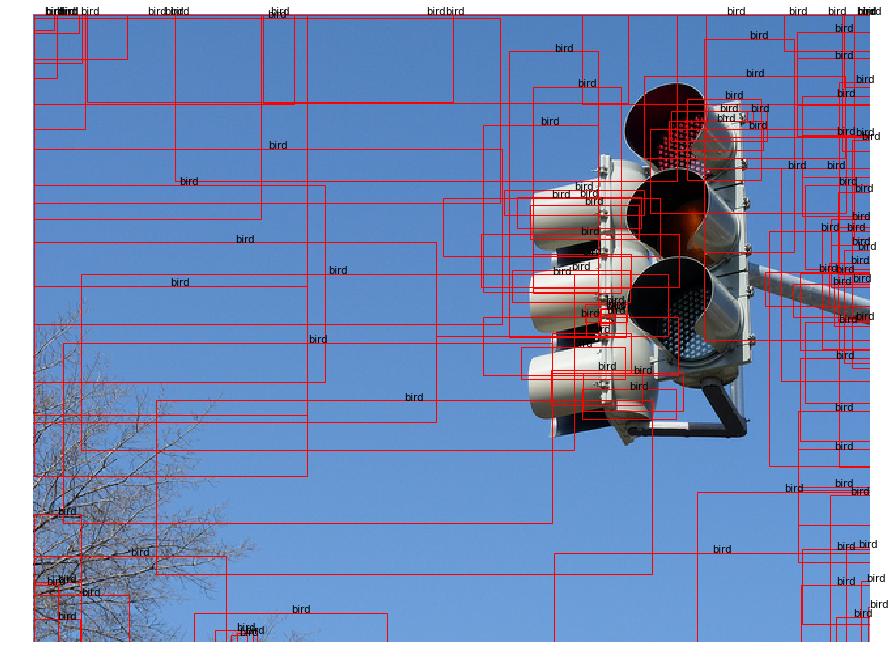

In [87]:
rois = [roi_tmp for roi_tmp in tmp if roi_tmp["image_id"]==roi["id"]]
print([roi_tmp['category_id'] for roi_tmp in rois])
visualize(roi['coco_url'],  [roi_tmp['bbox'] for roi_tmp in rois] , [roi_tmp['category_id'] for roi_tmp in rois])